In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import matplotlib.pyplot as plt
import autoreload
import sys
import os
import csv

from matplotlib import dates
from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [53]:
df = pd.read_csv("D:\Open Classroom\Data Files\Disney Movie Dataset\DisneyMoviesDataset.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),...,Box office,Story by,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,1937-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,83.0,1490000.0,418000000.0,1937-12-21,...,$418 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,1940-02-07,...,$164 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,126.0,2280000.0,83300000.0,1940-11-13,...,$76.4–$83.3 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,74.0,600000.0,960000.0,1941-06-20,...,"$960,000 (worldwide rentals)",NaN,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN


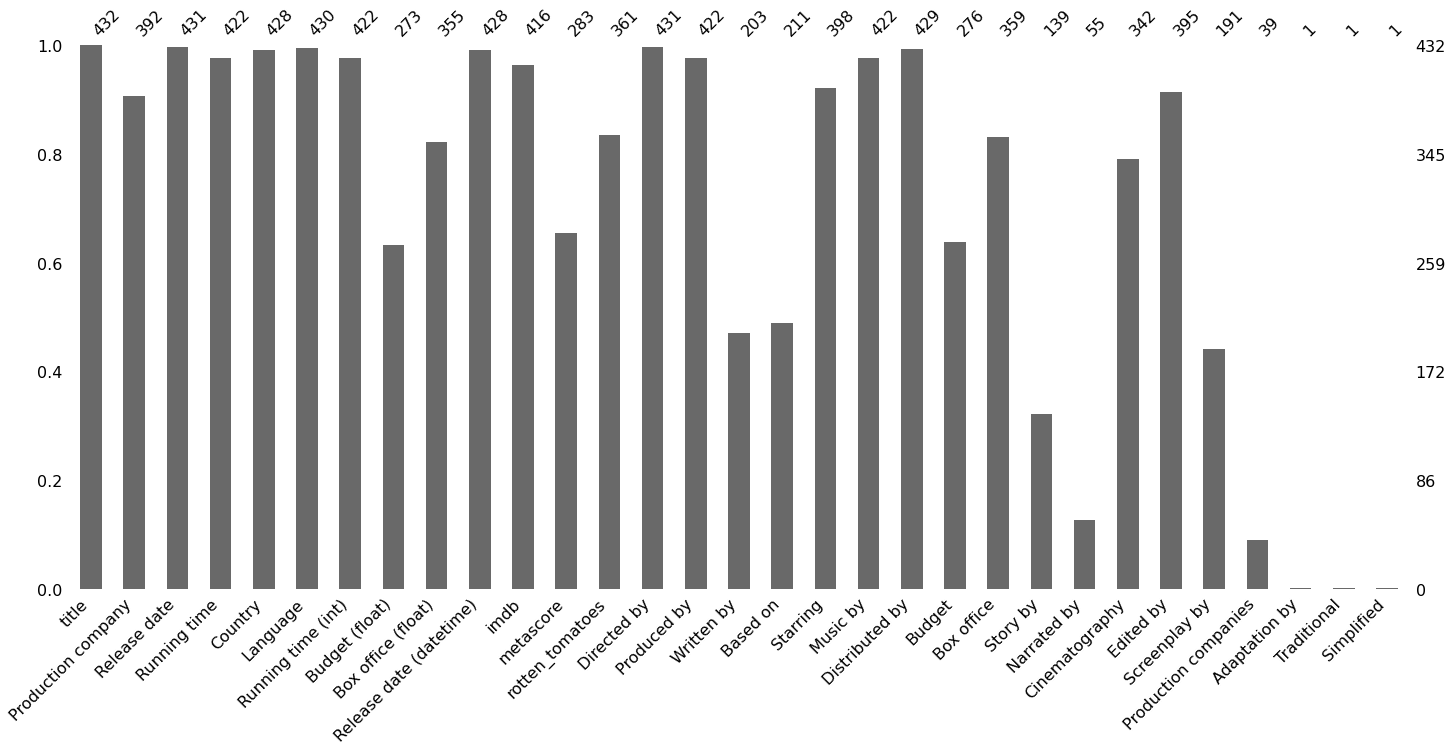

In [5]:
msno.bar(df)

In [29]:
with open("D:\Open Classroom\Data Files\Disney Movie Dataset\DisneyMoviesDataset.csv", encoding = "utf-8") as file:
    fileReader = csv.DictReader(file)
    fileCounter = Counter()
    
    for line in fileReader:
        split1 = fileCounter.update(line["Country"].split(", "))
        
print(fileCounter.most_common())

[('United States', 372), ("['United States'", 21), ("'United States']", 19), ("['United Kingdom'", 14), ('India', 8), ("'United Kingdom']", 7), ("'Canada']", 7), ('', 4), ("'United Kingdom'", 4), ("'France']", 3), ("'Australia']", 2), ("['France'", 2), ('France', 2), ("'France'", 2), ('Mexico', 1), ("'Norway']", 1), ('Australia', 1), ("['Norway'", 1), ("'Sweden'", 1), ("'Austria']", 1), ("'Germany']", 1), ("['Canada'", 1), ("'Malaysia'", 1), ("'Germany'", 1), ("['Germany'", 1), ("'Austria'", 1), ("'Italy'", 1), ("'Spain'", 1), ('Russia', 1), ('Germany', 1), ("['Australia'", 1), ("['Spain'", 1), ("'Italy']", 1), ("['United States']", 1), ("'China'", 1), ("'New Zealand'", 1)]


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    432 non-null    object 
 1   Production company       392 non-null    object 
 2   Release date             431 non-null    object 
 3   Running time             422 non-null    object 
 4   Country                  428 non-null    object 
 5   Language                 430 non-null    object 
 6   Running time (int)       422 non-null    float64
 7   Budget (float)           273 non-null    float64
 8   Box office (float)       355 non-null    float64
 9   Release date (datetime)  428 non-null    object 
 10  imdb                     416 non-null    float64
 11  metascore                283 non-null    float64
 12  rotten_tomatoes          361 non-null    object 
 13  Directed by              431 non-null    object 
 14  Produced by              4